In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns

Total Data (X) shape: (1000, 2)
Total Target Labels (Y) shape: (1000, 5)
Training Data (X_train) shape: (800, 2)
Testing Data (X_test) shape: (200, 2)



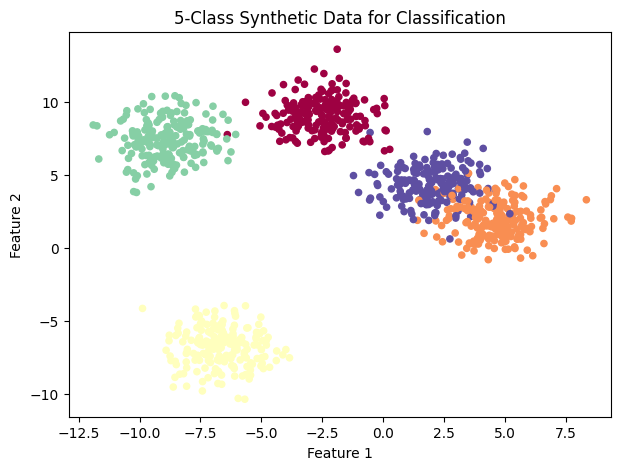

In [21]:
NUM_CLASSES = 5
NP_SEED = 42
np.random.seed(NP_SEED)

X, Y_labels = make_blobs(
    n_samples=1000,
    centers=NUM_CLASSES,
    n_features=2,
    random_state=NP_SEED,
    cluster_std=1.2
)

Y = np.zeros((Y_labels.size, NUM_CLASSES))
Y[np.arange(Y_labels.size), Y_labels] = 1

X_train, X_test, Y_train, Y_test, Y_labels_train, Y_labels_test = train_test_split(
    X, Y, Y_labels, test_size=0.2, random_state=NP_SEED
)

print(f"Total Data (X) shape: {X.shape}")
print(f"Total Target Labels (Y) shape: {Y.shape}")
print(f"Training Data (X_train) shape: {X_train.shape}")
print(f"Testing Data (X_test) shape: {X_test.shape}\n")


plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=Y_labels, cmap='Spectral', s=20)
plt.title(f"{NUM_CLASSES}-Class Synthetic Data for Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [22]:
class NeuralNetwork(object):
    def __init__(self, input_size, num_classes):
        inputLayerNeurons = input_size
        hiddenLayer1Neurons = 16
        hiddenLayer2Neurons = 16
        hiddenLayer3Neurons = 16
        outLayerNeurons = num_classes

        self.learning_rate = 0.01
        self.epochs = 10000

        self.W_HI1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons) * 0.01
        self.W_H2H1 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons) * 0.01
        self.W_H3H2 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons) * 0.01
        self.W_OH3 = np.random.randn(hiddenLayer3Neurons, outLayerNeurons) * 0.01

    #Activation Functions
    def relu(self, x, der=False):
        if der:
            return (x > 0).astype(float)
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    #Loss Function
    def cross_entropy_loss(self, pred, Y):
        """Calculates Categorical Cross-Entropy Loss."""
        m = Y.shape[0]
        p = np.clip(pred, 1e-12, 1. - 1e-12)
        loss = -np.sum(Y * np.log(p)) / m
        return loss

    def feedForward(self, X):
        self.X = X

        self.hidden_input1 = np.dot(X, self.W_HI1)
        self.hidden_output1 = self.relu(self.hidden_input1)

        self.hidden_input2 = np.dot(self.hidden_output1, self.W_H2H1)
        self.hidden_output2 = self.relu(self.hidden_input2)

        self.hidden_input3 = np.dot(self.hidden_output2, self.W_H3H2)
        self.hidden_output3 = self.relu(self.hidden_input3)

        output_input = np.dot(self.hidden_output3, self.W_OH3)
        self.pred = self.softmax(output_input)

        return self.pred


    def backPropagation(self, Y):
        m = Y.shape[0]

        output_delta = (self.pred - Y) / m

        dW_OH3 = self.hidden_output3.T.dot(output_delta)
        hidden_error3 = output_delta.dot(self.W_OH3.T)
        hidden_delta3 = hidden_error3 * self.relu(self.hidden_input3, der=True)

        dW_H3H2 = self.hidden_output2.T.dot(hidden_delta3)
        hidden_error2 = hidden_delta3.dot(self.W_H3H2.T)
        hidden_delta2 = hidden_error2 * self.relu(self.hidden_input2, der=True)

        dW_H2H1 = self.hidden_output1.T.dot(hidden_delta2)
        hidden_error1 = hidden_delta2.dot(self.W_H2H1.T)
        hidden_delta1 = hidden_error1 * self.relu(self.hidden_input1, der=True)
        dW_HI1 = self.X.T.dot(hidden_delta1)

        self.W_OH3 -= self.learning_rate * dW_OH3
        self.W_H3H2 -= self.learning_rate * dW_H3H2
        self.W_H2H1 -= self.learning_rate * dW_H2H1
        self.W_HI1 -= self.learning_rate * dW_HI1

    def train(self, X, Y):
        self.feedForward(X)
        self.backPropagation(Y)

    def predict(self, X):
        probabilities = self.feedForward(X)
        return np.argmax(probabilities, axis=1)

In [23]:
NN = NeuralNetwork(X_train.shape[1], NUM_CLASSES)
loss_history = []
print("Starting Training...")

for i in range(NN.epochs):
    NN.train(X_train, Y_train)

    loss = NN.cross_entropy_loss(NN.pred, Y_train)
    loss_history.append(loss)

    if i % 1000 == 0:
        train_predictions = NN.predict(X_train)
        train_acc = accuracy_score(Y_labels_train, train_predictions)
        print(f"Epoch {i:5d}: Loss = {loss:.4f}, Train Accuracy = {train_acc:.4f}")

print("\nTraining Complete.")
final_loss = loss_history[-1]

Starting Training...
Epoch     0: Loss = 1.6094, Train Accuracy = 0.2000
Epoch  1000: Loss = 1.6094, Train Accuracy = 0.2050
Epoch  2000: Loss = 1.6094, Train Accuracy = 0.2100
Epoch  3000: Loss = 1.6094, Train Accuracy = 0.2375
Epoch  4000: Loss = 1.6094, Train Accuracy = 0.2975
Epoch  5000: Loss = 1.6094, Train Accuracy = 0.3900
Epoch  6000: Loss = 1.6094, Train Accuracy = 0.3900
Epoch  7000: Loss = 1.6094, Train Accuracy = 0.3900
Epoch  8000: Loss = 1.6094, Train Accuracy = 0.3900
Epoch  9000: Loss = 1.6094, Train Accuracy = 0.3900

Training Complete.


In [24]:
test_predictions = NN.predict(X_test)

test_accuracy = accuracy_score(Y_labels_test, test_predictions)
precision, recall, f1_score, _ = precision_recall_fscore_support(
    Y_labels_test, test_predictions, average=None, zero_division=0
)
overall_precision, overall_recall, overall_f1_score, _ = precision_recall_fscore_support(
    Y_labels_test, test_predictions, average='weighted', zero_division=0
)


print("\n Test Set Performance Metrics")
print(f"Overall Accuracy: {test_accuracy:.4f}")
print(f"Overall Weighted Precision: {overall_precision:.4f}")
print(f"Overall Weighted Recall: {overall_recall:.4f}")
print(f"Overall Weighted F1-Score: {overall_f1_score:.4f}")
print("\nClass-wise Metrics:")
metrics_table = {
    'Class': list(range(NUM_CLASSES)),
    'Precision': precision.round(4),
    'Recall': recall.round(4),
    'F1-Score': f1_score.round(4)
}
for k in metrics_table:
    print(f"{k:<10}: {metrics_table[k]}")


 Test Set Performance Metrics
Overall Accuracy: 0.4400
Overall Weighted Precision: 0.2899
Overall Weighted Recall: 0.4400
Overall Weighted F1-Score: 0.3216

Class-wise Metrics:
Class     : [0, 1, 2, 3, 4]
Precision : [0.268 0.    1.    0.    0.   ]
Recall    : [1. 0. 1. 0. 0.]
F1-Score  : [0.4227 0.     1.     0.     0.    ]


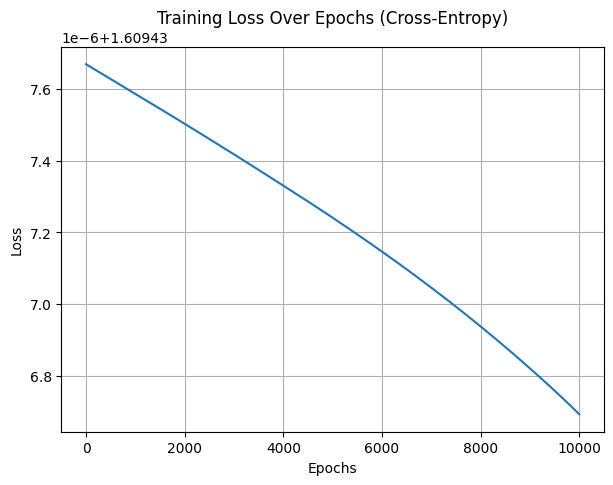

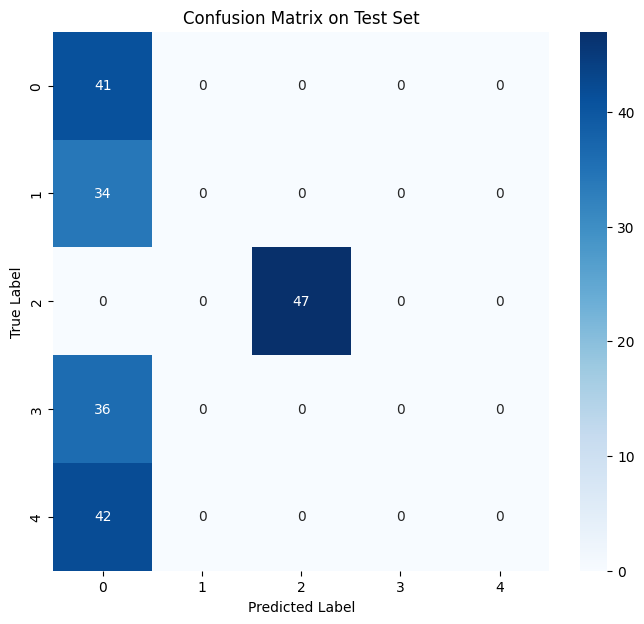

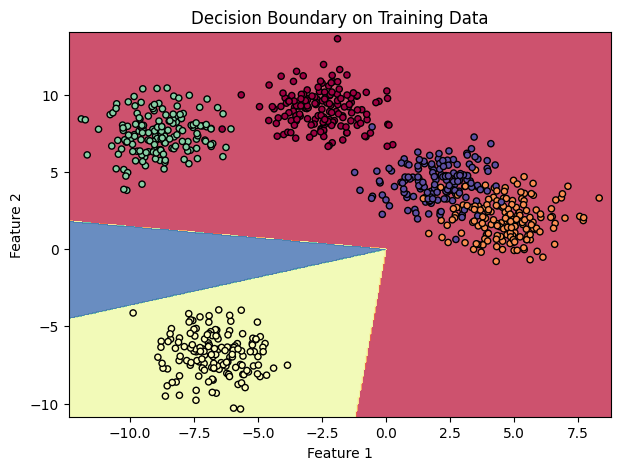

In [25]:

plt.figure(figsize=(7, 5))
plt.plot(loss_history)
plt.title("Training Loss Over Epochs (Cross-Entropy)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


conf_matrix = confusion_matrix(Y_labels_test, test_predictions)
plt.figure(figsize=(8, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(NUM_CLASSES), yticklabels=range(NUM_CLASSES))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()


x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Spectral')
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_labels_train, s=20, edgecolor='k', cmap='Spectral')
plt.title('Decision Boundary on Training Data')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()